# Import [PyAbel](https://github.com/PyAbel/PyAbel) library
We will handle it as an object `abel`

In [1]:
import abel

# Import other tools
 - numpy: A library to handle n-dimesional array (2-D matrix for our case) efficiently. Use it as `np`.
 - matplotlib: A library to plot graphs and images. Use it as `plt`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Run the test shown in [PyAbel document](http://pyabel.readthedocs.io/en/latest/readme_link.html#example-of-use)

In [3]:
original     = abel.tools.analytical.sample_image()
forward_abel = abel.Transform(original, direction='forward', method='hansenlaw').transform
inverse_abel = abel.Transform(forward_abel, direction='inverse', method='three_point').transform

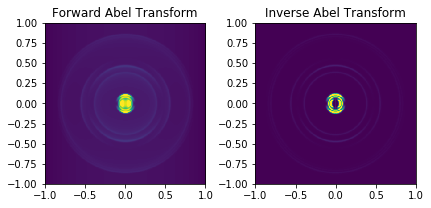

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(6, 4))

axs[0].imshow(forward_abel, clim=(0, np.max(forward_abel)*0.6), origin='lower', extent=(-1,1,-1,1))
axs[1].imshow(inverse_abel, clim=(0, np.max(inverse_abel)*0.4), origin='lower', extent=(-1,1,-1,1))

axs[0].set_title('Forward Abel Transform')
axs[1].set_title('Inverse Abel Transform')

plt.tight_layout()
plt.show()

... and more examples [here](http://pyabel.readthedocs.io/en/latest/examples.html).

# Test with artificial images
Note `abel.Transform()` returns [Abel transformed image class](http://pyabel.readthedocs.io/en/latest/abel.html#abel.transform.Transform) instance. See below.

## Symmetric image

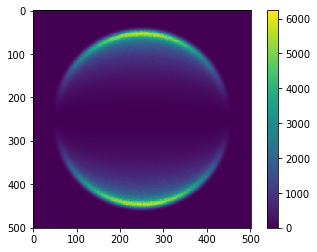

In [5]:
# This is a symmetric image with β ~ 2.0
sym_image = np.loadtxt("symmetric_image.tsv", delimiter='\t')

# It looks like this before reconstruction
plt.imshow(sym_image)
plt.colorbar()

In [6]:
# Reconstruction
sym = abel.Transform(sym_image, method='basex', direction='inverse')



# Actually "angular_integration=True" is set to derive a speed distribution (in our term)
# but it seems their program has a bug and thus, unfortunately, it doesn't work at this moment.

# sym = abel.Transform(sym_image, method='basex', direction='inverse', angular_integration=True)

A suitable basis set was not found. A new basis set will be generated. This may take a few minutes. But don't worry,                        it will be saved to disk for future use.

Generating horizontal BASEX basis sets for                n_horz = 501, nbf_vert = 251:

0...50...100...150...200...250...251
Generating vertical BASEX basis sets for n_vert = 251,             nbf_vert = 251:

...[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 

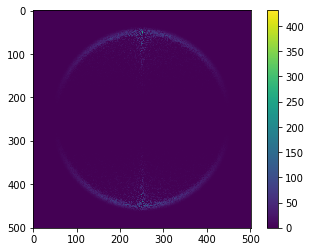

In [7]:
# sym.transform is a 2-D matrix of transformed image
# NOTE: np.where() is used to set negative pixels as 0
plt.imshow(np.where(sym.transform < 0, 0, sym.transform))
plt.colorbar()

In [8]:
# The speed distribution is in sym.angular_integration
# x, y = sym.angular_integration
# plt.plot(x, y)

## Asymmetric image
It seems `abel.Transform()` accepts asymmetric image by default, although I could not find the corresponding commit.  
The option `vertical_symmetry` discussed in [#54](https://github.com/PyAbel/PyAbel/pull/54) is not required anymore.  

Maybe related [#94](https://github.com/PyAbel/PyAbel/pull/94).

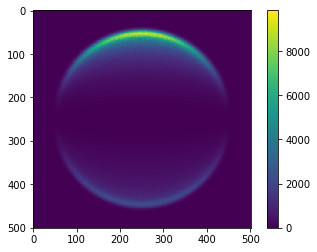

In [9]:
# This is an asymmetric image with β ~ 2.0
asym_image = np.loadtxt("asymmetric_image.tsv", delimiter='\t')

# It looks like this before reconstruction
plt.imshow(asym_image)
plt.colorbar()

In [10]:
# Reconstruction
asym = abel.Transform(asym_image, method='basex', direction='inverse')

Loading basis sets...           
Loading basis sets...           
Loading basis sets...           
Loading basis sets...           


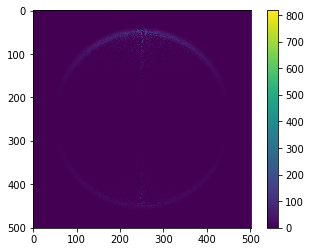

In [11]:
# asym.transform is a 2-D matrix of transformed image
# NOTE: np.where() is used to set negative pixels as 0
plt.imshow(np.where(asym.transform < 0, 0, asym.transform))
plt.colorbar()

## Options

For more info, check [here](https://github.com/PyAbel/PyAbel/blob/1e984af0d18fd2e5c74d2aa45ec9786420cda5d1/abel/transform.py#L83)

### center

An option for centering of images

 - A fixed center like (y-center, x-center)
 
```sym = abel.Transform(sym_image, method='basex', direction='inverse', center=(251, 251))```

 - Fix only one axis (Probably the y-center will be determined by height/2)
 
```sym = abel.Transform(sym_image, method='basex', direction='inverse', center=(None, 251))```

---

The following options are for automatic centering.

 - **image_center**: center is assumed to be the center of the image.

```sym = abel.Transform(sym_image, method='basex', direction='inverse', center='image_center')```

 - **convolution**: center the image by convolution of two projections along each axis.

```sym = abel.Transform(sym_image, method='basex', direction='inverse', center='image_center')```

 - **slice**: the center is found my comparing slices in the horizontal and vertical directions

```sym = abel.Transform(sym_image, method='basex', direction='inverse', center='slice')```

 - **com**: the center is calculated as the center of mass

```sym = abel.Transform(sym_image, method='basex', direction='inverse', center='com')```

 - **gaussian**: the center is found using a fit to a Gaussian function. This only makes sense if your data looks like a Gaussian.

```sym = abel.Transform(sym_image, method='basex', direction='inverse', center='gaussian')```

 - **none**(default): No centering is performed. An image with an odd number of columns must be provided.

```sym = abel.Transform(sym_image, method='basex', direction='inverse', center='none')```

### symmetry_axis

An option for symmetrizing of image

 - **Vertical symmetrize**

```sym = abel.Transform(sym_image, method='basex', direction='inverse', symmetry_axis=0)```


 - **Horizontal symmetrize**

```sym = abel.Transform(sym_image, method='basex', direction='inverse', symmetry_axis=1)```

 - **Both (vertical and horizontal) symmetrize**

```sym = abel.Transform(sym_image, method='basex', direction='inverse', symmetry_axis=(0, 1))```